In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [2]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()

In [3]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,2344.000000,2344.000000,2.344000e+03,2344.000000,2.344000e+03,2344.000000,2.344000e+03,2.344000e+03
mean,7548.350621,-0.990424,-5.895742e-07,-0.000168,-4.952150e-07,-0.000011,2.453067e-07,1.729460e-08
std,4349.693426,0.001021,3.212275e-03,0.000715,2.139333e-03,0.006607,1.474166e-03,2.512213e-08
min,19.280590,-0.991668,-4.523862e-03,-0.001139,-3.247579e-03,-0.009040,-2.084719e-03,-2.785758e-08
25%,3783.815250,-0.991459,-3.224401e-03,-0.000878,-1.993437e-03,-0.006529,-1.487002e-03,-2.321468e-09
50%,7548.350500,-0.990587,-1.529082e-05,-0.000219,-5.756147e-06,-0.000394,6.194265e-06,1.033334e-08
75%,11312.887500,-0.989400,3.228971e-03,0.000540,1.972725e-03,0.006461,1.480479e-03,3.709943e-08
max,15077.420000,-0.988843,4.523994e-03,0.000913,3.247771e-03,0.009939,2.084456e-03,7.822104e-08


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

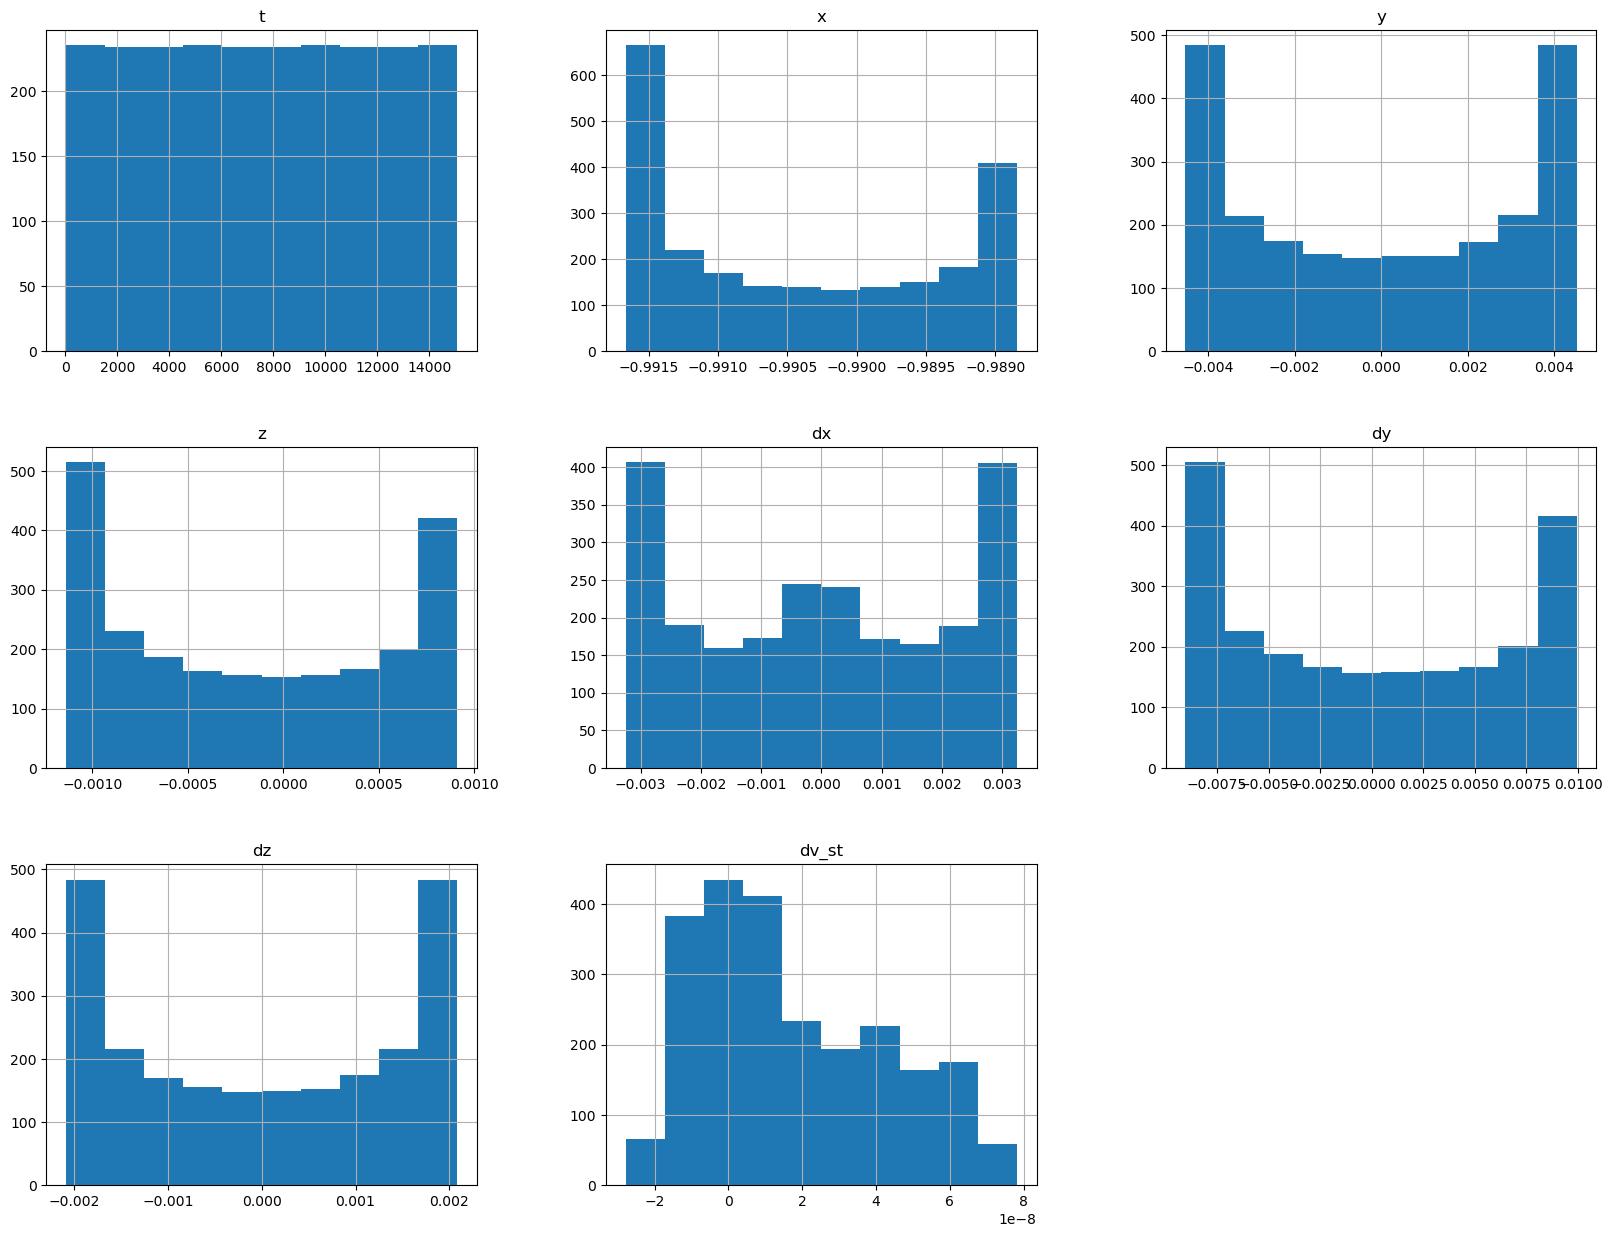

In [4]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

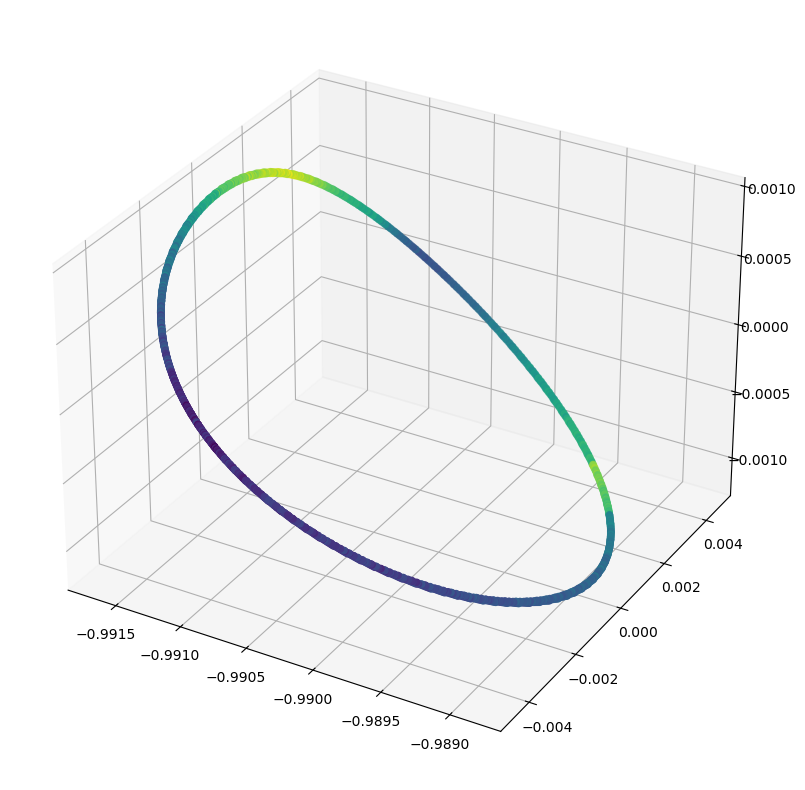

In [5]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [6]:
maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t", "dx", "dy", "dz"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
y        0.649538
z        0.344936
angle    0.036192
x       -0.263549
Name: dv_st, dtype: float64

array([[<Axes: xlabel='angle', ylabel='angle'>,
        <Axes: xlabel='x', ylabel='angle'>,
        <Axes: xlabel='y', ylabel='angle'>,
        <Axes: xlabel='z', ylabel='angle'>,
        <Axes: xlabel='dv_st', ylabel='angle'>],
       [<Axes: xlabel='angle', ylabel='x'>,
        <Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='z', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='angle', ylabel='y'>,
        <Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='z', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='angle', ylabel='z'>,
        <Axes: xlabel='x', ylabel='z'>, <Axes: xlabel='y', ylabel='z'>,
        <Axes: xlabel='z', ylabel='z'>,
        <Axes: xlabel='dv_st', ylabel='z'>],
       [<Axes: xlabel='angle', ylabel='dv_st'>,
        <Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='z', ylabe

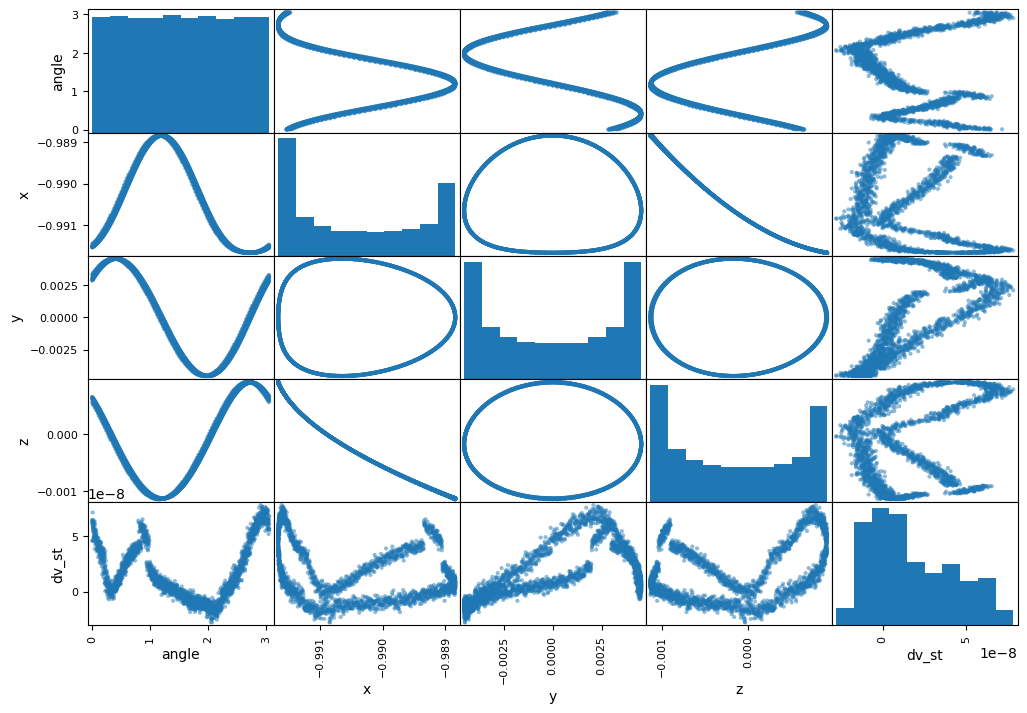

In [7]:
attributes = ["angle", "x", "y", "z", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [8]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,angle
0,-0.989189,0.002520,-0.000968,0.925230
1,-0.988843,-0.000112,-0.001121,1.233637
2,-0.989246,-0.002703,-0.000941,1.542054
3,-0.990157,-0.004300,-0.000479,1.850461
4,-0.991066,-0.004307,0.000136,2.158868


In [9]:
## Create Train/Test/Validation Sets

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(1406, 4)
(469, 4)
(469, 4)


,x,y,z,angle
1506,-0.990699,0.004521,-0.000144,0.387659
2256,-0.991398,-0.003596,0.000466,2.249755
1560,-0.989930,-0.004063,-0.000611,1.749053
578,-0.989852,-0.003960,-0.000647,1.750541
842,-0.990190,0.004328,-0.000463,0.571774


In [11]:
# Scale all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.34270339, 0.99970324, 0.48472094, 0.12533699],
       [0.09555335, 0.10253825, 0.78205537, 0.73551234],
       [0.61513135, 0.05090478, 0.25739151, 0.57144124],
       [0.64281668, 0.06228898, 0.23940235, 0.57192886],
       [0.52315372, 0.9783699 , 0.32924956, 0.18566828]])

In [12]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_valid_scaled = scaler.transform(y_valid)
y_test_scaled = scaler.transform(y_test)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [14]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.11067377588868445

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [15]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [16]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.2857887668599007, 0.8061598086400446, 0.6358156808601017, 0.5799010205826585, 0.578971332771863, 0.8791846085478865, 0.7142223381111104, 0.522952598742329, 0.1644293638058263, 0.9231056173242073]
Labels: [array([0.31323176]), array([0.61029885]), array([0.66548245]), array([0.54007217]), array([0.59287423]), array([0.86186915]), array([0.7224222]), array([0.53047061]), array([0.15729183]), array([0.91389896])]


In [17]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.014701208500284573

## Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
#print(maneuvers_pred_poly[0])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
maneuvers_predictions = lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.05391396373105987

## SVM Regression

In [20]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0684071045931597

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [21]:
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, X_train_scaled, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
tree_rmse_scores = -scores

In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [0.04707286 0.04718263 0.05264928 0.04843841 0.05162081]
Mean: 0.0493928010323937
Standard deviation: 0.0023128547549733243
